<a href="https://colab.research.google.com/github/francescodisalvo05/Data-Science-Lab-Exercises/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration 
Today I'd like to go trough the process of the Data Exploration. 

But.. Some of you may ask: what are we referring to when we talk about **Data Exploration**?
Well, we can say that it includes a set of preliminary analysis about our data, with the aim of explore the main features and for characterizing them. 

I think that it is sometimes understimated, probably because we're too hungry to gain insights and so, we proceed straight forward to our goal. But, these simple steps could improve the entire process, because it helps to understand better our tools (the data). It will be more valuable when we're not expert in that specific domain, so we should be patient and explore step by step each feature. 

So, let's get the **weapons** ready and let's go!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

If you're reading this, probably you may know what these libraries do, otherwise, don't worry!

In short:

*   **Pandas** provides data structures and analysis tools for handling data. It is based on numpy arrays
*   **Numpy** is used for extremely efficient computations with vectors and matrix. It's extremely useful when we need to manipulate our dataset
*   **Matplotlib** and **Seaborn** are two graphic libraries that allow to make some fancy infographics


## Look at the data
The first step seems quite obvious! We have to see with what we're working on. We'll work with the IRIS dataset, that is a toy dataset containing just 5 columns. But what do they represent? Let's check on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris) and we should gain the informations that we need. 

"*The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.*"

The five attributes are:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class (Iris Setosa, Iris Versicolour, Iris Virginica)

Now we're ready for reading it with Pandas.

In [2]:
df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      header=None)
df_iris = df_iris.rename(columns={0:'sepal_length',
                                  1:'sepal_width',
                                  2:'petal_length',
                                  3:'petal_width',
                                  4:'class'})

Now we can just look at the first five rows with the **head()** method, otherwise we could get some random values with the **sample()** method. 

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Then, thanks to the **info()** method we can have a brief description of the dataset. Of course here we have just 5 rows and it won't provide new informations, but it is useful when we have way more attributes. In fact it will give a list of them with their type and the number of non-null values.

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The author already said that, but now we can confirm that there are 150 entries, even if we don't know actually if they're exactly 50 per each class. How can we do that? We can use the **count_values()** method! As you may imagine, it is quite useful with categorical data

In [ ]:
df_iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Ok, now we're sure that they didn't lie! Now we can use the **describe()** method for a specific description about all the numerical attributes, in this specific case, the firt four columns

In [ ]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



*  **count** : counts the rows
*   **mean** : compute the mean along the column
*   **std**  : compute the standard deviation, so it measures how far are the values from the mean
*   **25-50-75%** : they represents the percentiles, that is a statistic measure that indicates the value below which a given percentage of observations in a group of observations falls.
*   **max**  : indicates the maximum values



## Distribution
We can discover some other features by looking at the distributions. In this case we'll show how many times a vaue will appear in the dataset. The most readible solution is by **histograms** that will plot the frequency of each value. An easy way for plotting any numerical valus is by the **hist()** method

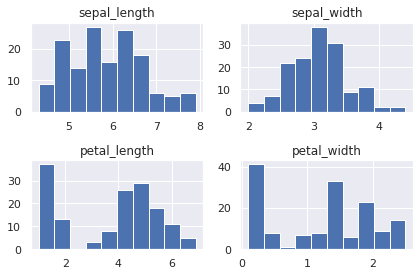

In [3]:
# set the seaborn style
sns.set()

df_iris.hist()

# avoid overlap
plt.tight_layout()

Of course it gives general informations, but we could be more specific, so we'll use some fancy graphs!

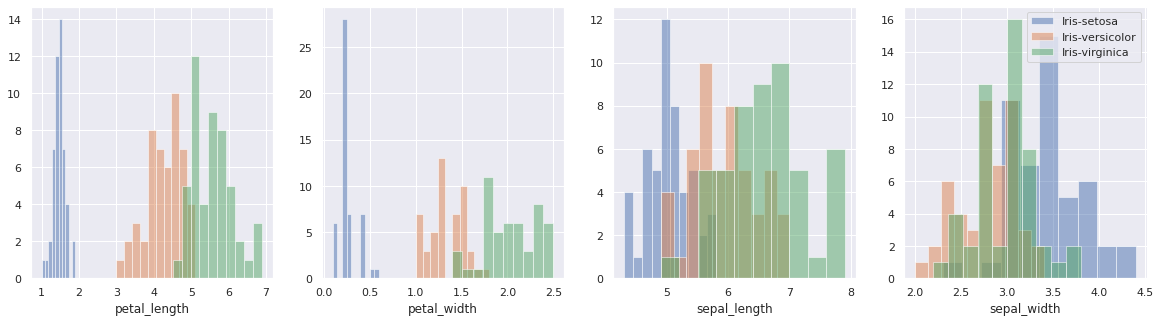

In [9]:
f, axes = plt.subplots(1, 4,figsize=(20,5))
f.figsize=(20,15)

measures = ['petal_length','petal_width','sepal_length','sepal_width']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

# different graph for each measure (4)
for i,measure in enumerate(measures):
  # one distplot for each class (3)
  for c in classes:
    axes[i].hist(df_iris[df_iris["class"] == c][measure],alpha=0.5)
  axes[i].set_xlabel(measure)
  
plt.legend(labels=classes)

In this case we have a clear overview about those values. In fact, it can be clearly seen that the values for the petal length and width are well-separated. Then there is a lighter "seperation" among the sepal width and length, and consequently they're not so useful for the classes' separation.



## Cumulative Distribution Function
Another way for providing a visual representation of an attribute distribution, is by its CDF (Cumulative Distribution Function) that is defined as 
<center>
  $F(x) = P(X \le x)$ <br />
  $0 \le F(x) \le 1$ 
</center>
So, as we may know the CDF will be at least 0 and at most 1, due to the fact that we're evalutating in a "progressive" way, this function will be a "step function". As a consequence, a stronger presence of a value will be denoted by a strong increasing of the curve.

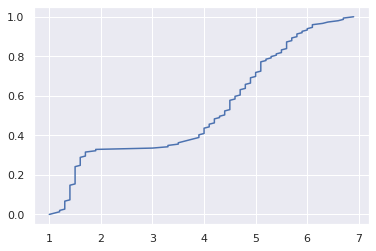

In [10]:
# we need an increasing sorting
sorted_data = np.sort(df_iris["petal_length"])

# 1/N , 1/2N ... 
yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals)

plt.show()

From the graph we can individuate that there is a "massive" presence of petal length from 1 to 2, and from 4 to 6. If you see the previous graphs it is confirmed. Pay attention that in this case we are not considering a particular iris class, but all of them.  

## Outlier detection
The outliers are values that are out of the "average", so we can define them "abnormal" data. Those outliers could show a problem in the database, or may detect some problems with the sensors and so on. But, sometimes there are cases where we actually look for outliers, in order to detect some anomalies, for example in case of fraud. 

There are several methods that help in this process, and they can be discovered thanks an univariate analysis or a multivariate ones. They can be discovered both in a mathematical or graphical way, thanks to Boxplots, Histograms, Scatterplot, Z-score, robust z-score and many others. 

### Boxplot
It is a standard way for exploiting outliers based on five "special points": minimum, first quartile, median, third quartile and maximum. From the first and fourth quartile we have from the 25th percentile to the 75th one. 

The extreme lines define the range where we can consider "normal values". They're defined as Q1-1,5*IQR and Q3+1,5*IQR. So you multiply for 1.5 the height of the box. 

It is quite important to examine also the length of these lines, because they provide undercovered insights. In particular, when they have the same length we know that they have the same distance from the median. If it is unbalanced to the right, it means that the third quartile will have an higher distance from the mean, and vice versa

Let's see for the non categorical attributes 

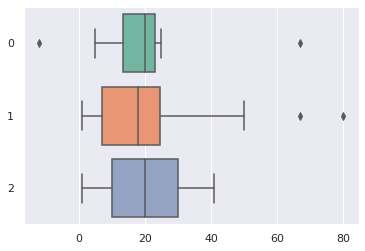

In [40]:
# unbalanced from the left
array0 = np.array([-12,20,25,16,23,14,13,67,20,23,5])
# unbalanced from the right
array1 = np.array([1,1,1,25,16,23,14,13,67,80,50,20,23,5])
# balanced
array2 = np.array([1,10,10,10,20,20,30,30,30,41])

sns.boxplot(data=[array0,array1, array2], orient="h", palette="Set2")

### Histograms
We saw them before, and they could be useful also for detecting outliers, but they're not so accurate, because for much more smaller values, there is the risk that we don't recognize them at all. Let's see an example. 

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.001e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

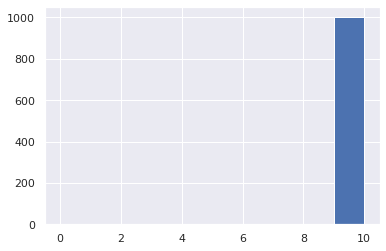

In [47]:
array1 = []

# add 1,2,.. , 9
for i in range(10):
  array1.append(i)

# add 10, 1000 times 
for i in range(1000):
  array1.append(10)

plt.hist(array1)

In this case we have 10 candidates for outliers, but because there is a much greater frequency on 10, they won't appear, so in this way we could miss them.

### Z-Score
This definition came from statistics. It is well-known that 99.7% of the points relies among $\mu + or - 3\sigma$, where $mu$ is the mean and $\sigma$ is the stanard deviation. 

<img src="https://images.squarespace-cdn.com/content/v1/53e4e1bbe4b08bfde27b5214/1444164857460-T50FJE9CGPYYEAOSQBWA/ke17ZwdGBToddI8pDm48kBAn57fvxhJmgXL6GZy1xhUUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYy7Mythp_T-mtop-vrsUOmeInPi9iDjx9w8K4ZfjXt2dsXMtqy5rx4mcmbzj6URbFz6p6kzYKQ5yPdvVFehL9j1CjLISwBs8eEdxAxTptZAUg/image-asset.png?format=2500w" width="70%"/>

It means that if the result of the z-score is greater than 3 for a certain data point, it should be considered as an outlier. The formula is the following one:

<center> $z-score  = \frac {X-\mu} \sigma$</center>


In [59]:
array = np.array([20,25,16,23,14,1342,13,120,20,23,5,20,-18])
outliers = []

for i in array:
  z = abs((i-array.mean())/array.std())
  if z > 3:
    outliers.append(i)

print("Outliers:\t",outliers)

Outliers:	 [1342]


### Scatterplot
Another graphical way is by using the scatterplot, that print for every copule of data. If there is a strong relationship among x and y, if there is some "strange" value, it will be immediately discovered

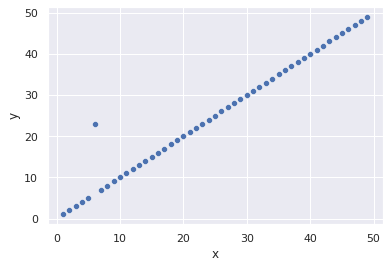

In [103]:
x = [i for i in range(1,50)]

# y = x -> first bisector
y = x.copy()

#outlier (it is not anymore y[5] = x[5])
y[5] = 23

# dataframe
df_scatter = pd.DataFrame({'x':x,'y':y})

sns.scatterplot(data=df_scatter, x="x",y="y")

## Correlation analysis
When you have to perform any kind of analysis, it is important to look for correlations, for many reasons. Firstly, an higher correlation could align some important features among attributes, and in this case you should focus on that. Then, sometimes when some attributes are too correlated you could eliminate one of the two, in order to save space and improve the efficiency on your model.


There are several graph that can be used for highlighting correlations such as scatter plot, scatter plot percentiles, heatmap and many other analytical way

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


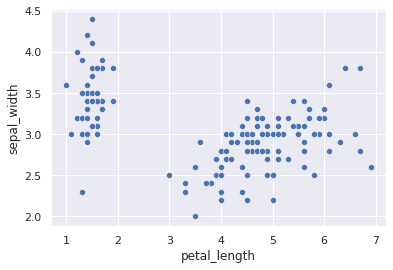

In [98]:
# relationship among the sepal width and the petal length
x = df_iris["petal_length"]
y = df_iris["sepal_width"]

sns.scatterplot(x,y)

Of course there could be a relationship if you can define a particular trend, such as before for y = x. 

### Correlation matrix
The correlation matrix measure how much any variable is correlated with the remaining ones. It is performed by the **corr()** pandas method. It works just with numerical attributes, in fact when we deal with categorical attributes it is suggested to convert them into numeric ones, with well-known tecniques such as the one hot encoding and so on.

In [99]:
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


The correlation matrix can be plotted with an heatmap, that higlights the stronger and lighter correlation in a better way, by using different color tones

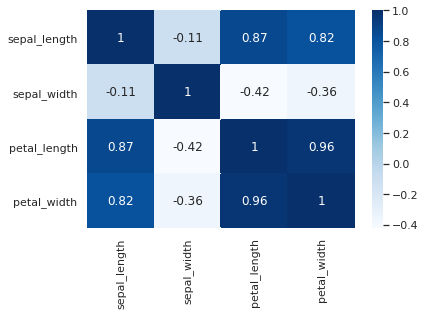

In [100]:
sns.heatmap(df_iris.corr(), annot=True, cmap="Blues")

Now we can describe better our results. Of course the matrix is symmetric, because we compare couples of elements. Then, we can see a quite high correlation among petal_length and petal_width, and also for the sepal_length and petal_length. Obviously we could image a similar result, but it is way more satisfying when you find your own evidences!